## Gradient Descent:
###### Gradient Descent is an optimization algorithm used to minimize the loss function of a model by iteratively adjusting the model's parameters. The basic idea is to compute the gradient (partial derivatives) of the loss function with respect to each parameter and move in the direction that reduces the loss.

### Types of Gradient Descent:

#### Batch Gradient Descent:

###### Description: Uses the entire dataset to compute the gradient of the loss function and update the model parameters.
###### Pros: Provides a stable and accurate estimate of the gradient.
###### Cons: Can be very slow and memory-intensive for large datasets.

#### Stochastic Gradient Descent (SGD):

###### Description: Uses only one sample (or a small batch) from the dataset to compute the gradient and update the parameters.
###### Pros: Faster and requires less memory; can escape local minima.
###### Cons: The updates can be noisy and less stable, leading to a slower convergence.

#### Mini-Batch Gradient Descent:

###### Description: A compromise between Batch and Stochastic Gradient Descent. Uses a small random subset of the dataset (mini-batch) to compute the gradient and update the parameters.
###### Pros: More efficient than Batch Gradient Descent and more stable than SGD.
###### Cons: Requires tuning of mini-batch size.

#### Variants of Gradient Descent:

###### Momentum: Accelerates convergence by adding a fraction of the previous update to the current update.
###### Nesterov Accelerated Gradient (NAG): Computes the gradient with respect to the "lookahead" position, improving convergence.
###### Adagrad: Adapts the learning rate based on the frequency of updates.
###### RMSprop: Adjusts the learning rate based on recent gradients.
###### Adam: Combines Momentum and RMSprop, adjusting learning rates and incorporating momentum.

#### Validation Set & Validation Loss
#### Validation Set:

###### Description: A subset of the dataset that is used to evaluate the model during training. It helps in tuning hyperparameters and assessing the model's performance on unseen data.
###### Purpose: Provides an unbiased evaluation of the model's performance and helps prevent overfitting by providing feedback on how the model generalizes to new data.

#### Validation Loss:

###### Description: The loss calculated on the validation set. It measures how well the model is performing on unseen data during training.
###### Purpose: Used to monitor the model's performance and adjust training parameters. A decreasing validation loss indicates that the model is learning and generalizing well, while an increasing validation loss suggests overfitting.

#### Step-by-Step MLP Model Creation:

#### Import Libraries

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#### Load and Prepare Data

In [13]:
# Load tips dataset
tips = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(tips.head())

# Convert categorical variables to numerical using one-hot encoding
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Separate features and target variable
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### Define the MLP Model

In [14]:
# Create a Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))  # Assuming regression task (predicting 'tip')


C:\Users\Faizan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the Model

In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')  # Using mean squared error for regression


#### Train the Model

In [16]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 12.5344 - val_loss: 8.5764
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.3831 - val_loss: 7.3821
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.5088 - val_loss: 6.3196
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.5732 - val_loss: 5.3408
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.6574 - val_loss: 4.4340
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 5.2186 - val_loss: 3.6083
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3.7489 - val_loss: 2.9017
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1790 - val_loss: 2.3559
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.7450 - val_loss: 1.9948
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.5968 - val_loss: 1.8197
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.5131 - val_loss: 1.7840
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.3048 - val_

#### Evaluate the Model

In [17]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[:5])

# Calculate and print accuracy or performance metric
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predictions:  [[3.3887098]
 [2.0706503]
 [4.1268053]
 [2.7501395]
 [2.3981006]]
Test Loss: 1.2603330612182617


#### Plot Training History

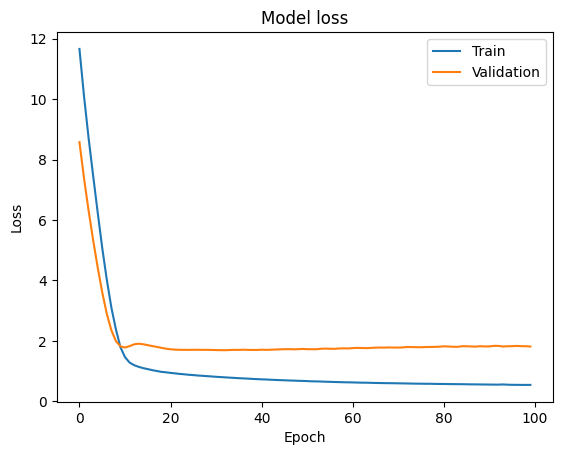

In [18]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
